# Review of Exercise 3:
Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).


In [2]:
# first thing to do is to import the necessary modules

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [3]:
data = xr.open_dataset('/Users/abigailpozulp/Downloads/CESM.003.SST.1980.nc')

In [4]:
lat = np.array(data.lat)
lon = np.array(data.lon)
data = np.array(data.SST)

In [5]:
meandata = np.mean(data, axis = 0)
meandata.shape

(180, 360)

#becaue latitude goes from negative, to positive, to zero, you can define the tropics as latitudes between -23.5 and 23.5

In [42]:
mymask = (lat >= -23.5) & (lat<= 23.5)

In [43]:
# this will mask the tropics only
mymask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
# this will mask the regions outside of the tropics
nontropic_mask = ((lat >= 23.5) & (lat<= 89.5)|(lat>= -89.5) & (lat<= -23.5))

In [45]:
nontropic_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [47]:
# in order to apply the mask, it needs to have the same number of axes as the dataset
# the dataset should have two axes (after you take the mean of the months)
# the mask I made only has one axis, how do I spread it to the others?

# going over Exercise 3 togetheer

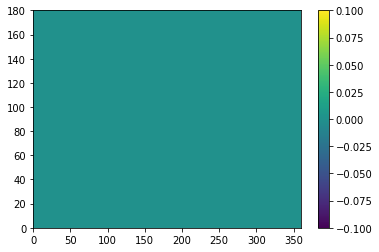

In [54]:
plt.pcolormesh(nontropic_mask)
plt.colorbar()

### we're going to make a different mask but the idea is the same

In [55]:
# make a mask using the lat array

trop = 23.4368

(lat> trop) | (lat< (-1*trop))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [57]:
# the easiest way to do this is to make a mask array that is the same size as the mean sst array
mask = np.zeros_like(meandata)
mask.shape

(180, 360)

In [58]:
# we want every longitude, all 360, to have the same mask we just created
for i in range(360):
    mask[:,i] = (lat> trop) | (lat< (-1*trop))

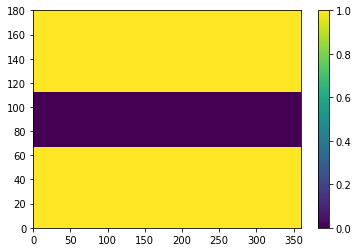

In [59]:
plt.pcolormesh(mask)
plt.colorbar()

In [61]:
# take the mean SST and mask
sst_trop = np.ma.masked_where(mask,meandata)

(-23.4368, 24.4368)

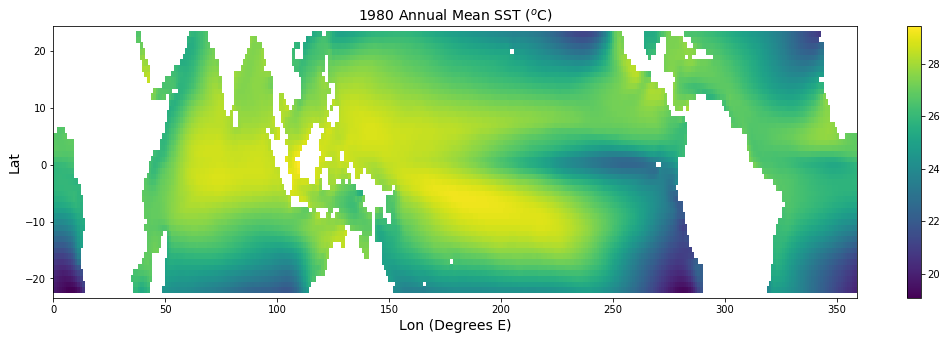

In [62]:
plt.figure(figsize=(18,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)', fontsize = 14)
plt.ylabel('Lat', fontsize = 14)
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)', fontsize = 14)
plt.ylim([-trop,trop+1])

In [63]:
# if I want to change all of my plots:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
# note this method changes tick mark font sizes as well

(-23.4368, 24.4368)

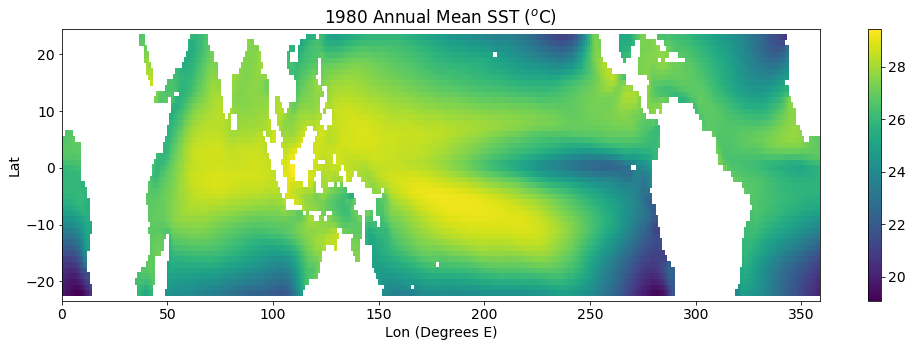

In [64]:
# now I don't have to put in all of the fontsize commands
plt.figure(figsize=(17,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)')
plt.ylabel('Lat')
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)')
plt.ylim([-trop,trop+1])

# Part 2: Finding data
From #5: Find the grid cell closest to us. Plot the seasonal cycle of SST.
The latitude of South Padre Island is 26.1118° N, 97.1681° W

In [65]:
lat

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [66]:
# use np.where to find elements that are greater than a given value
np.where(lat>26.1118)
# these are all the elements that are greater than 26

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]),)

In [67]:
lat[116] # yes this is gerater than 26.1118

26.5

# aside: finding values in a 2D array

In [69]:
# if we had a 2D array it would give us two arrays, one for each dimension
np.where(meandata > 20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(array([ 53,  53,  53, ..., 130, 130, 130]),
 array([ 21,  22,  23, ..., 296, 297, 298]))

In [70]:
# we can assign arrays to these indices where the constraint is true
xind, yind = np.where(meandata > 20)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [71]:
xind

array([ 53,  53,  53, ..., 130, 130, 130])

In [72]:
yind

array([ 21,  22,  23, ..., 296, 297, 298])

In [73]:
meandata[53,21] # yes this is greater than 20

20.000555

# back to the main problem

In [75]:
# where is better at nD arrays rather than 1D arrays, where it gives weirdly formatted output
np.where(lat>26.1118)

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]),)

In [76]:
xind= np.where(lat>26.1118)

In [77]:
# what kind of thing is xind?
xind?

In [78]:
# what kind of thing is xind?
xind?

In [79]:
xind[0][0]

116

In [80]:
lat[xind[0][0]]

26.5

In [81]:
# note lon is 0 to 360 East
# we want  97.1681° W = 360 - 97.1681 E
mylon = 360 - 97.1681
mylon

262.8319

In [82]:
# same thing for lon
np.where(lon > 262.8319)[0][0]

263

In [84]:
meandata.shape
# remember this is lat by lon

(180, 360)

In [86]:
meandata[116,263]
# what is wrong here?...nan is 

nan

(20, 40)

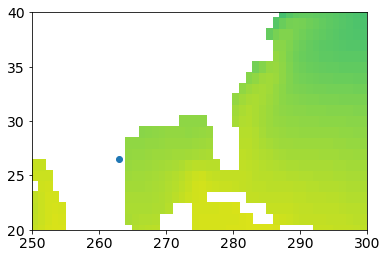

In [88]:
# let's try some investigative plotting
plt.pcolormesh(lon,lat,meandata)
plt.scatter(lon[263],lat[116])
plt.xlim(250,300)
plt.ylim(20,40)
#yeah, that's on land

In [89]:
# it's on land because of our scale, so we need to move it east by increasingthe lon

In [90]:
meandata[116,264]
# move over one to offshore

24.422651

(20, 40)

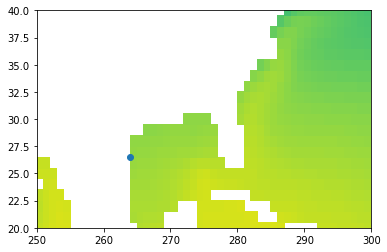

In [167]:
plt.pcolormesh(lon,lat,meandata)
plt.scatter(lon[264],lat[116])
plt.xlim(250,300)
plt.ylim(20,40)

### Exercise: Make a line plot of the montly temperature at this location
#Which month is it hottest? How hot is it?
#Which is it coldest? How cold is it?
#Now use max and min functions with np. where to find the above values

In [168]:
#first of all we know the average of the temps at that location:
meandata[116,264] 

24.422651

In [171]:
meandata.shape

(180, 360)

In [172]:
data.shape

(12, 180, 360)

In [176]:
#to print the temp values for each month at that location:
data[:,116,264]

array([20.885736, 20.171156, 20.36427 , 21.646374, 23.664062, 25.98356 ,
       27.198414, 28.140438, 28.368649, 27.225416, 25.978275, 23.445436],
      dtype=float32)

In [192]:
# now that I have the monthly values I'm going to make a dataset of those two

In [191]:
spadre_temps = [20.885736, 20.171156, 20.36427 , 21.646374, 23.664062, 25.98356 ,
       27.198414, 28.140438, 28.368649, 27.225416, 25.978275, 23.445436]

In [197]:
spadre_months = [1,2,3,4,5,6,7,8,9,10,11,12]

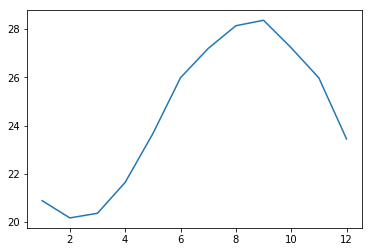

In [195]:
plt.plot(spadre_months,spadre_temps)

##### I did it!!! September is the hottest at 28.36C, February is the coldest at 20.17C

# Part 3 Mesh Graphing
See https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
Suppose we want to plot a 2D function. When we wanted to plot a 1D function we used an np.arange or np.linspace

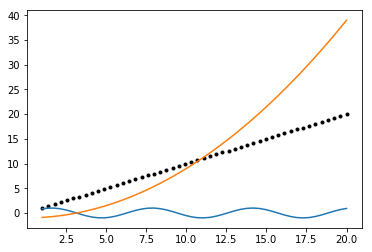

In [182]:
x = np.linspace(1, 20, 50) # the x values to evaluate a function at

# we can use the x values above to evaluate any function
y1 = np.sin(x)
y2 = 0.1* x**2 -1

plt.plot(x,x, '.k')
plt.plot(x,y1)
plt.plot(x,y2)

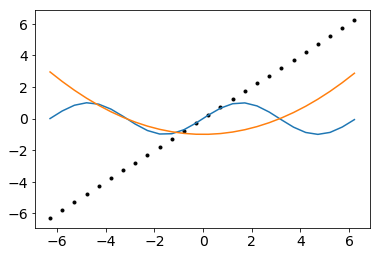

In [96]:
# similarly
#x = np.linspace(-np.pi*2, np.pi*2, 100) # the x values to evaluate a function at
x = np.arange(-np.pi*2, np.pi*2, 0.5) # the x values to evaluate a function at
# the arguement in arange(start, stop, step)

# we can use the x values above to evaluate any function
y1 = np.sin(x)
y2 = 0.1* x**2 -1

plt.plot(x,x,'k.')
plt.plot(x,y1)
plt.plot(x,y2)


### Exercise: In words, what is different about the arange and linspace x arrays?

Answer: the syntax is different.
#arange uses x = np.arange(start, stop, step)
#linspace uses x = np.linspace(start, stop, total number of points desired)

Now we want to plot a 2D function, so we need a point x and a point y to evaluate for every location on the 2D grid.
In

In [148]:
x = np.linspace(-np.pi*2, np.pi*2, 50)
y = np.linspace(-1,1,50)
X,Y = np.meshgrid(x,y)

### Exercise: what are X and Y? Plot them
Answer: X and Y are 2-dimensional arrays containing 50 by 50 values

In [149]:
X

array([[-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       ...,
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531]])

In [150]:
Y

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.95918367, -0.95918367, -0.95918367, ..., -0.95918367,
        -0.95918367, -0.95918367],
       [-0.91836735, -0.91836735, -0.91836735, ..., -0.91836735,
        -0.91836735, -0.91836735],
       ...,
       [ 0.91836735,  0.91836735,  0.91836735, ...,  0.91836735,
         0.91836735,  0.91836735],
       [ 0.95918367,  0.95918367,  0.95918367, ...,  0.95918367,
         0.95918367,  0.95918367],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [151]:
 X.shape

(50, 50)

In [152]:
Y.shape

(50, 50)

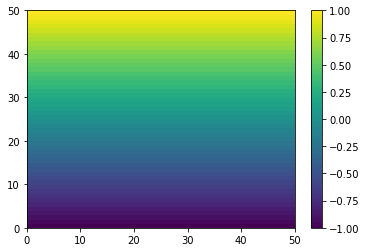

In [155]:
plt.pcolormesh(Y)
plt.colorbar()

#including the colorbar lets you see the range of values in your plot

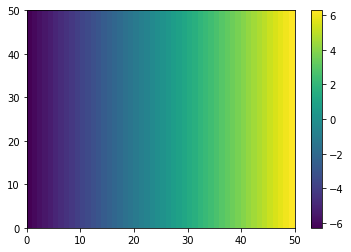

In [146]:
plt.pcolormesh(X)
plt.colorbar()

We can use X and Y to evaluate a function

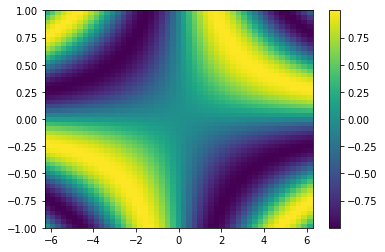

In [157]:
z = np.sin(X*Y)
plt.pcolormesh(x,y,z) 
plt.colorbar()

# note that x and y were used to plot z

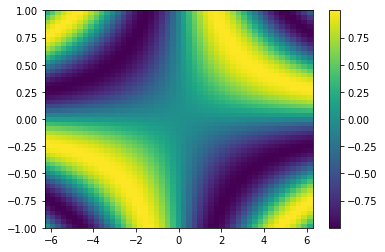

In [158]:
z = np.sin(X*Y)
plt.pcolormesh(X,Y,z) 
plt.colorbar()

# note that another way to plot z uses X and Y

### Exercise: Could we use x and y to define z above? Why or why not?
Answer: I tried, it gives you something very different than what we did above


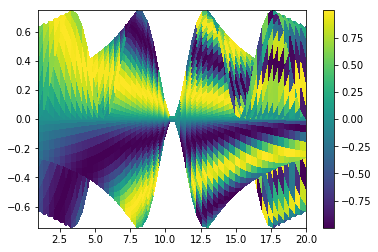

In [199]:
z = np.sin(y*x)
plt.pcolormesh(x,y,z) 
plt.colorbar()


### Exercise: Do exercises 3 and 4 above using meshgrids instead of for loops
#3 Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).

#4 Exercise: Mask out the tropics and plot again.


In [6]:
#lon and lat will be axes, you can use them to define the mesh plot

lon, lat = np.meshgrid(lon,lat)

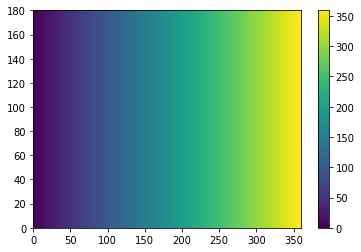

In [7]:
plt.pcolormesh(lon)
plt.colorbar()

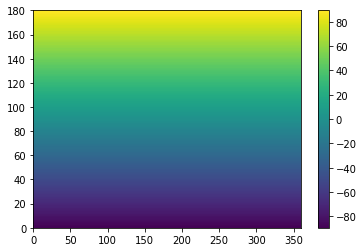

In [8]:
plt.pcolormesh(lat)
plt.colorbar()

In [19]:
#I'm not sure how the original masked maps would be different using meshgrids, both commands use the "pcolormesh"
#I'd like a clearer explanation of what is a mesh grid versus the plots
# this is how Tom did it with meshgrids

In [13]:
dataset = xr.open_dataset('/Users/abigailpozulp/Downloads/CESM.003.SST.1980.nc')

In [14]:
data4 = dataset
lat = np.array(data4.lat)
lon = np.array(data4.lon)
SST = np.array(data4.SST)
mean_SST = np.mean(SST, axis = 0)



In [16]:
temp_mask1 = ((lat < (0 + 23.4368)) & (lat > (0 - 23.4368)))
lon_temp = np.zeros(360)
lon_mesh, lat_mesh = np.meshgrid(lon_temp, temp_mask1)

SST_mask = np.ma.masked_where(lat_mesh, mean_SST)



Text(0.5, 1.0, 'Mean Sea Surface Tempearture for the Tropics')

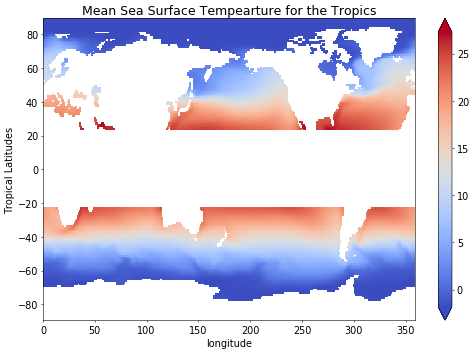

In [17]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 50
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.0

fig, ax = plt.subplots(figsize = (12,8))
p = ax.pcolormesh(lon, lat, SST_mask, cmap = "coolwarm")
plt.colorbar(p, extend = "both")
plt.xlabel("longitude", fontsize = 14)
plt.ylabel("Tropical Latitudes", fontsize = 14)
plt.title("Mean Sea Surface Tempearture for the Tropics", fontsize = 18)

